In [1]:
# Importing libraries
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
### function for counting number of combinations to be used as modifiers

def count_combs(n):
# def combi(n:int, r:int):
    result = []
    for i in range(n+1):
        result.append(math.comb(n,i))
    
    return result

In [3]:
# def count_combs(n):
# # def combi(n:int, r:int):
#     result = {}
#     for i in range(n+1):
#         result[i] = math.comb(n,i)
    
#     return result

In [4]:
### setting up the PVP envrionment. -> how many VS how many ?

def create_pvp_env(n1, n2):
    result = []
    result.append(count_combs(n1-1))       ### minus ME
    result.append(count_combs(n2))
    return result

In [5]:
my_team_combs = count_combs(4)

In [6]:
op_team_combs = count_combs(5)

In [7]:
my_perc = 0.82

In [8]:
print(create_pvp_env(5,5))

[[1, 4, 6, 4, 1], [1, 5, 10, 10, 5, 1]]


In [9]:
### team probability, dependent on number of combination counts and percentile

def create_team_probs(n_my_team, n_op_team, my_perc):
    result = []
    
    ### percentage of population above my_perc
    above_perc = 1 - my_perc
    
    pvp_env = create_pvp_env(n_my_team, n_op_team)
    
    ### minus one to account for myself for later use
    n_my_team -= 1
        
    my_team_combs, op_team_combs = pvp_env[0], pvp_env[1]
    
    ### initiate my_team_probs
    my_team_probs = []
    
    ### calculate probs
    for i in range(len(my_team_combs)):
        comb_x_prob = my_team_combs[i] * ( my_perc**(n_my_team-i) * above_perc**i )
        my_team_probs.append(comb_x_prob)
        
    
    
    ### initiate op_team_probs
    op_team_probs = []
    
    ### calculate probs
    for i in range(len(op_team_combs)):
        comb_x_prob = op_team_combs[i] * ( my_perc**(n_op_team-i) * above_perc**i )
        op_team_probs.append(comb_x_prob)
    
    
    
    result.append(my_team_probs)
    result.append(op_team_probs)
    
    return result

In [10]:
team_probs = create_team_probs(5,5,0.82)

In [11]:
team_probs

[[0.4521217599999999,
  0.39698496,
  0.13071456000000004,
  0.019128960000000014,
  0.0010497600000000011],
 [0.37073984319999986,
  0.406909584,
  0.17864323200000007,
  0.03921436800000003,
  0.004304016000000004,
  0.00018895680000000024]]

In [12]:
### this function needs the result of create_team_probs as input


def create_multiplied_probs(team_probs):
    ### team_probs = result of function create_team_probs
    result = {}
    my_team_probs = team_probs[0]
    op_team_probs = team_probs[1]
    
    for i in range(len(my_team_probs)):
        result[i] = []
        for item in op_team_probs:
            result[i].append(my_team_probs[i]*item)
            
        
    return result

In [13]:
multiplied_probs = create_multiplied_probs(team_probs)

In [14]:
# result = []
# for item in list(multiplied_probs.values()):
#     result.extend(item)
    
# print(result)
# print(sum(result))

In [15]:
multiplied_probs

{0: [0.1676195504097079,
  0.18397267727894778,
  0.08076849246392832,
  0.017729669077447687,
  0.0019459392889881614,
  8.543148097996808e-05],
 1: [0.14717814182315822,
  0.16153698492785665,
  0.07091867630979075,
  0.01556751431190529,
  0.0017086296195993618,
  7.50130076897281e-05],
 2: [0.04846109547835699,
  0.05318900723234305,
  0.023351271467857936,
  0.005125888858798085,
  0.0005625975576729607,
  2.4699404971008037e-05],
 3: [0.0070918676309790745,
  0.007783757155952645,
  0.003417259239198724,
  0.0007501300768972811,
  8.233134990336015e-05,
  3.6145470689280075e-06],
 4: [0.0003891878577976323,
  0.00042715740489984044,
  0.00018753251922432027,
  4.116567495168007e-05,
  4.518183836160009e-06,
  1.9835929036800048e-07]}

In [16]:
# list(multiplied_probs.values())

In [17]:
### this function needs the result of function create_multiplied_probs as input

def which_team_has_more(multiplied_probs):
    ### multiplied_probs = result of function create_multiplied_probs
    result = {}
    result['more_on_op'] = 0
    result['equal_on_both'] = 0
    result['more_on_my'] = 0
    
    
    ### iterate my team -> keys of given dict
    for item_1 in list(multiplied_probs.keys()):
        one_list = list(multiplied_probs.values())[item_1]
        # print('item_1: ', item_1)
        # print('-----------')
        # print('item_1: ', item_1)
        
        ### iterate one list of lists
        for i in range(len(one_list)):
            if i > item_1:
                result['more_on_op'] += one_list[i]
            if i == item_1:
                result['equal_on_both'] += one_list[i]
            elif i < item_1:
                result['more_on_my'] += one_list[i]
            else:
                pass
        
                
    return result

In [18]:
result = which_team_has_more(multiplied_probs)
result

{'more_on_op': 0.37857137291698184,
 'equal_on_both': 0.35326245506615594,
 'more_on_my': 0.26816617201686216}

In [19]:
loss_prob = result['more_on_op'] + result['equal_on_both']/2
loss_prob

0.5552026004500599

In [20]:
win_prob = result['more_on_my'] + result['equal_on_both']/2
win_prob

0.44479739954994013

In [21]:
def calculate_probs(n_my_team, n_op_team, my_perc):
    final_result = {}
    result_1 = create_team_probs(n_my_team, n_op_team, my_perc)
    result_2 = create_multiplied_probs(result_1)
    result_3 = which_team_has_more(result_2)
    
    loss_prob = result_3['more_on_op'] + result_3['equal_on_both']/2
    win_prob = result_3['more_on_my'] + result_3['equal_on_both']/2
    
    final_result['loss_prob'] = loss_prob
    final_result['win_prob'] = win_prob
    
    return final_result

In [22]:
calculate_probs(5,5,0.82)

{'loss_prob': 0.5552026004500599, 'win_prob': 0.44479739954994013}

In [23]:
my_perc = 0.643

In [24]:
# calculate_probs(5,5,0.55)

In [25]:
calculate_probs(5,5,my_perc)

{'loss_prob': 0.5912268861700798, 'win_prob': 0.4087731138299202}

In [26]:
axv = int(200*my_perc)
print(axv)

128


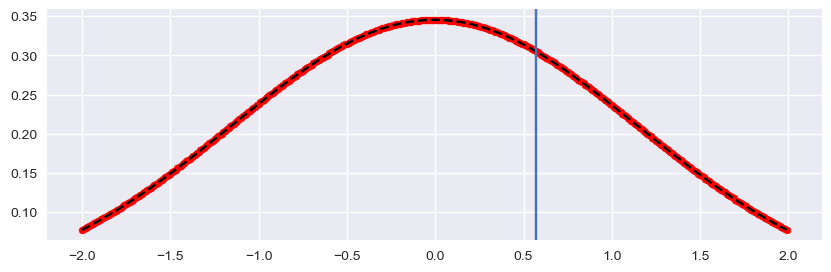

In [27]:
### https://www.geeksforgeeks.org/how-to-make-a-bell-curve-in-python/

def pdf(x):
    mean = np.mean(x)
    std = np.std(x)
    y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))
    return y_out
    
# To generate an array of x-values
x = np.arange(-2, 2, 0.01)
  
# To generate an array of
# y-values using corresponding x-values
y = pdf(x)

### set value for axvline
axv = int(len(x)*my_perc)
# print(axv)
  
# Plotting the bell-shaped curve
plt.style.use('seaborn')
plt.figure(figsize = (10, 3))
plt.plot(x, y, color = 'black',
         linestyle = 'dashed')
  
plt.scatter( x, y, marker = 'o', s = 25, color = 'red')

plt.axvline(x[axv])
plt.show()

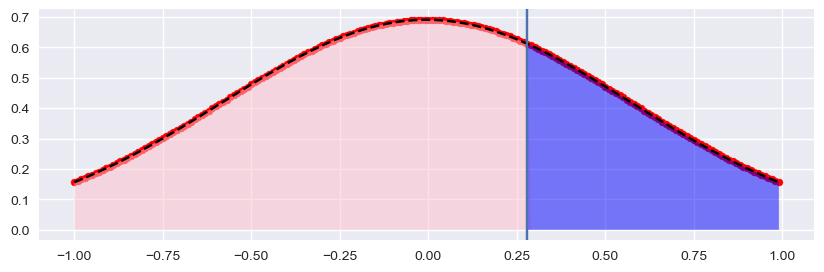

In [28]:
### https://www.geeksforgeeks.org/how-to-make-a-bell-curve-in-python/

limit = 1

def pdf(x):
    mean = np.mean(x)
    std = np.std(x)
    y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))
    return y_out
    
# To generate an array of x-values
x = np.arange(-limit, limit, 0.01)
  
# To generate an array of
# y-values using corresponding x-values
y = pdf(x)

### set value for axvline
axv = int(len(x)*my_perc)
# print(axv)
  
# Plotting the bell-shaped curve
plt.style.use('seaborn')
plt.figure(figsize = (10, 3))
plt.plot(x, y, color = 'black',
         linestyle = 'dashed')
  
plt.scatter( x, y, marker = 'o', s = 25, color = 'red')

plt.axvline(x[axv])
# To fill in values under the bell-curve
x_fill_1 = np.arange(-limit, limit, 0.01)
y_fill_1 = pdf(x_fill_1)

# x_fill_2 = np.arange(x[axv], limit, 0.01)
# y_fill_2 = pdf(x_fill_2)


# plt.fill_between(x_fill_1, y_fill_1, 0, alpha = 0.2, color = 'blue')
# plt.fill_between(x_fill_2, y_fill_2, 0, alpha = 0.2, color = 'pink')

### https://stackoverflow.com/questions/58343857/how-to-partial-fill-between-in-matplotlib-as-in-different-colors-for-different
plt.fill_between(x_fill_1, 0, y_fill_1, where=x_fill_1<=x[axv], facecolor='pink', interpolate=True, alpha = 0.5)
plt.fill_between(x_fill_1, 0, y_fill_1, where=x_fill_1>=x[axv], facecolor='blue', interpolate=True, alpha = 0.5)


plt.show()

In [29]:
# print(x)

In [30]:
def total_package(n_my_team, n_op_team, my_perc, limit=1, ):

    final_result = {}
    result_1 = create_team_probs(n_my_team, n_op_team, my_perc)
    result_2 = create_multiplied_probs(result_1)
    result_3 = which_team_has_more(result_2)
    
    loss_prob = result_3['more_on_op'] + result_3['equal_on_both']/2
    win_prob = result_3['more_on_my'] + result_3['equal_on_both']/2
    
    final_result['loss_prob'] = loss_prob
    final_result['win_prob'] = win_prob
    
    def pdf(x):
        mean = np.mean(x)
        std = np.std(x)
        y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))
        return y_out
    
    # To generate an array of x-values
    x = np.arange(-limit, limit, 0.01)

    # To generate an array of
    # y-values using corresponding x-values
    y = pdf(x)

    ### set value for axvline
    axv = int(len(x)*my_perc)
    # print(axv)

    # Plotting the bell-shaped curve
    plt.style.use('seaborn')
    plt.figure(figsize = (10, 3))
    plt.plot(x, y, color = 'black',
             linestyle = 'dashed')

    plt.scatter( x, y, marker = 'o', s = 25, color = 'red')

    plt.axvline(x[axv])
    # To fill in values under the bell-curve
    x_fill_1 = np.arange(-limit, limit, 0.01)
    y_fill_1 = pdf(x_fill_1)

    # x_fill_2 = np.arange(x[axv], limit, 0.01)
    # y_fill_2 = pdf(x_fill_2)


    # plt.fill_between(x_fill_1, y_fill_1, 0, alpha = 0.2, color = 'blue')
    # plt.fill_between(x_fill_2, y_fill_2, 0, alpha = 0.2, color = 'pink')

    ### https://stackoverflow.com/questions/58343857/how-to-partial-fill-between-in-matplotlib-as-in-different-colors-for-different
    plt.fill_between(x_fill_1, 0, y_fill_1, where=x_fill_1<=x[axv], facecolor='pink', interpolate=True, alpha = 0.5)
    plt.fill_between(x_fill_1, 0, y_fill_1, where=x_fill_1>=x[axv], facecolor='blue', interpolate=True, alpha = 0.5)


    plt.show()
    
    
    return final_result

In [31]:
my_perc

0.643

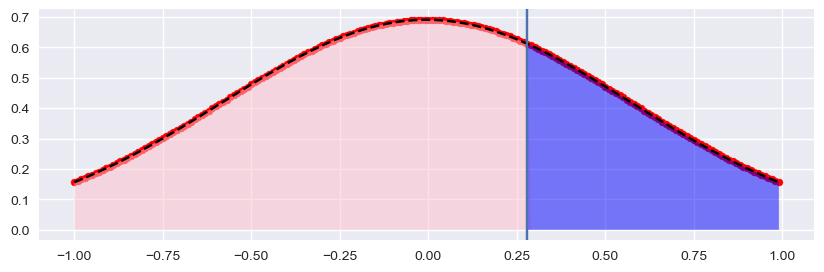

{'loss_prob': 0.5912268861700798, 'win_prob': 0.4087731138299202}

In [32]:
total_package(5,5,my_perc)

In [33]:
def total_package_vert(n_my_team, n_op_team, my_perc, limit=1, ):

    final_result = {}
    result_1 = create_team_probs(n_my_team, n_op_team, my_perc)
    result_2 = create_multiplied_probs(result_1)
    result_3 = which_team_has_more(result_2)
    
    loss_prob = result_3['more_on_op'] + result_3['equal_on_both']/2
    win_prob = result_3['more_on_my'] + result_3['equal_on_both']/2
    
    final_result['loss_prob'] = loss_prob
    final_result['win_prob'] = win_prob
    
    def pdf(x):
        mean = np.mean(x)
        std = np.std(x)
        y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))
        return y_out
    
    # To generate an array of x-values
    x = np.arange(-limit, limit, 0.01)
    
    ### set value for axvline to mark ax line
    axh = int(len(x)*my_perc)
    
    # To generate an array of
    # y-values using corresponding x-values
    y = pdf(x)
    
    x, y = y, x
    
    ### set value for axvline
    
    # print(axh)

    # Plotting the bell-shaped curve
    plt.style.use('seaborn')
    plt.figure(figsize = (3, 6))
    plt.plot(x, y, color = 'black',
             linestyle = 'dashed')

    plt.scatter( x, y, marker = 'o', s = 25, color = 'red')

    plt.axhline(y[axh])
    # To fill in values under the bell-curve
    x_fill_0 = np.arange(-limit, limit, 0.01)
    y_fill_0 = pdf(x_fill_0)
    
    
    ### https://stackoverflow.com/questions/74241300/fill-between-two-horizontal-lines-thresholds-in-matplotlib
    plt.fill_between(y_fill_0, x_fill_0[axh], x_fill_0, where=(x_fill_0>=x_fill_0[axh]), facecolor='blue', interpolate=True, alpha = 0.5)
    plt.fill_between(y_fill_0, x_fill_0[axh], x_fill_0, where=(x_fill_0<=x_fill_0[axh]), facecolor='pink', interpolate=True, alpha = 0.5)
    # plt.fill_between()
    

    plt.show()
    
    
    return final_result

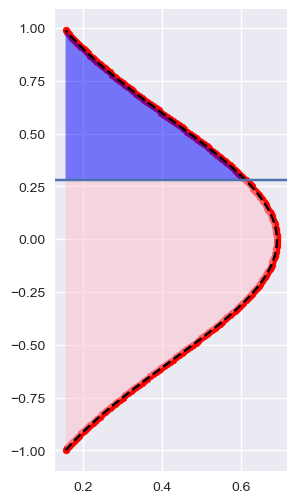

{'loss_prob': 0.5912268861700798, 'win_prob': 0.4087731138299202}

In [34]:
total_package_vert(5,5,my_perc)

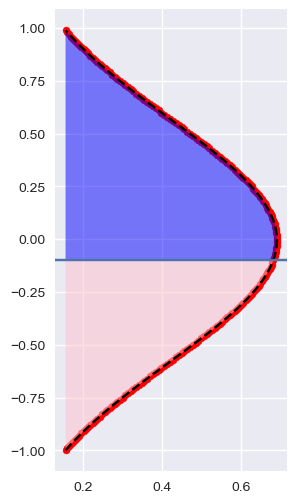

{'loss_prob': 0.635957018119141, 'win_prob': 0.36404298188085954}

In [35]:
my_perc = 0.45
total_package_vert(5,5, my_perc)  ### 0.45

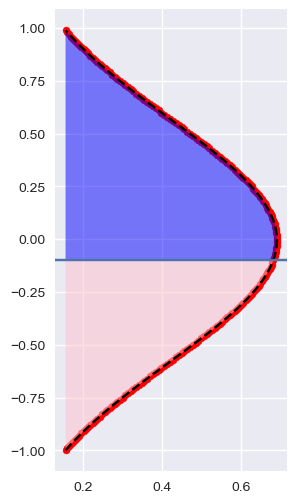

{'loss_prob': 0.5000000000000002, 'win_prob': 0.5000000000000002}

In [36]:
total_package_vert(6,5, 0.45)

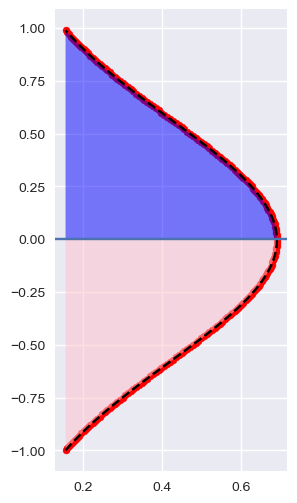

{'loss_prob': 0.623046875, 'win_prob': 0.376953125}

In [37]:
total_package_vert(5,5, 0.5)

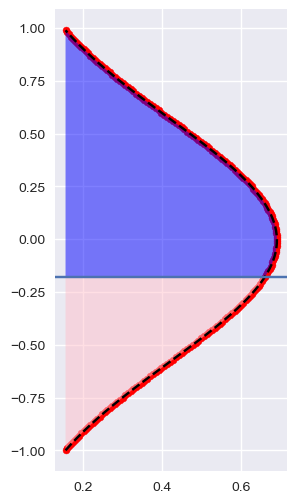

{'loss_prob': 0.647330632066366, 'win_prob': 0.35266936793363435}

In [38]:
my_perc = 0.41
total_package_vert(5,5, my_perc)